<h2><b>📌 Introduction </b></h2>

In [2]:
# 🎯 TASK 3: CUSTOMER CHURN PREDICTION 
AIM: Predict which customers are likely to leave the bank (churn) using their personal and account details.

In [9]:
# STEP 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# STEP 2: Load the Dataset
# Load churn dataset and view the first few records
df = pd.read_csv("Churn_Modelling.csv")
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
# STEP 3: Drop irrelevant columns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Churn_Modelling.csv")
df.drop([col for col in ['RowNumber', 'CustomerId', 'Surname'] if col in df.columns], axis=1, inplace=True)
df.dropna(inplace=True) # remove row with missing value

# STEP 4: Uncoding Catergorical features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [31]:
# STEP 5: 80% train, 20% test
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1) # define x
y = df['Exited'] # define y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
# STEP 6: Random Forest Classifier (train model to learn pattern)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42)

<h2><b>Evaluation</b></h2>


In [33]:
# STEP 7: Evaluation of the Model (supervised model classification)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 86.60%
Confusion Matrix:
 [[1549   44]
 [ 224  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.81      0.45      0.58       407

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



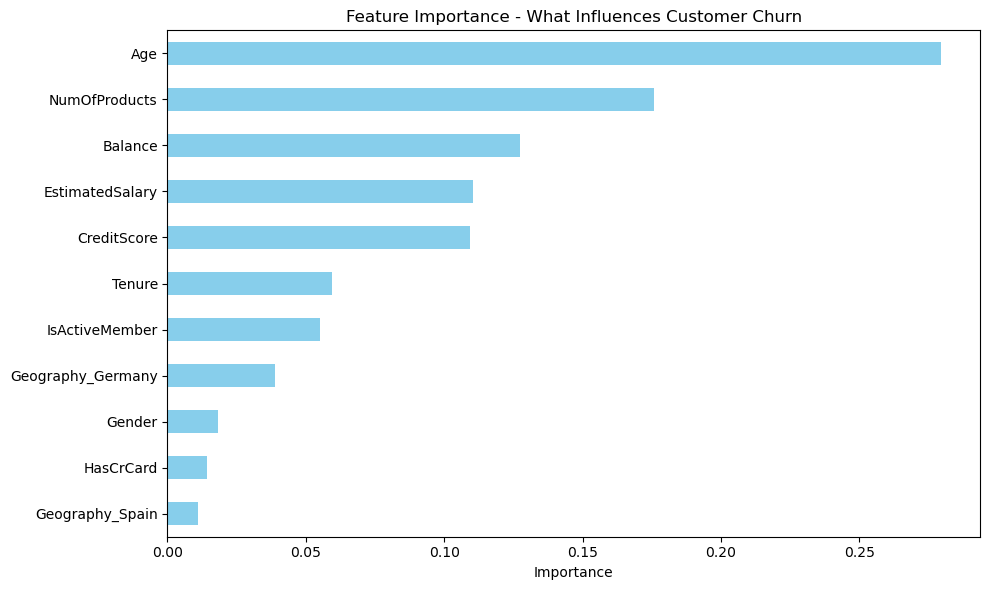

In [34]:
# STEP 8: Analyze feature that influence Churn
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance - What Influences Customer Churn")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

<h2><b>Conclusion</b></h2>

In [ ]:
We built a supervised classification model using Random Forest to predict which customers are likely to leave the bank.

- Achieved 86% accuracy.
- Important features that majorly influences churn: Age, Name of product, Balance, Estimated Salary
- Categorical features were encoded successfully.
- Model helps the bank take early action to reduce churn.

In [ ]:
# Load and save Task 3 - Churn Modelling dataset
churn_df = pd.read_csv("Churn_Modelling.csv")
churn_df.to_csv("task3_churn_clean.csv", index=False)+6